In [2]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

%matplotlib inline 

## Sample Submission

In [ ]:
sample_sub = pd.read_csv("./datasets/train_val/sample_submission.csv")

In [ ]:
sample_sub.describe()

In [ ]:
sample_sub[sample_sub["ImageId"] == "9d3cd0de1.jpg"]

In [ ]:
# 14 unwanted test images
unwanted_test_images = ['13703f040.jpg',
 '14715c06d.jpg',
 '33e0ff2d5.jpg',
 '4d4e09f2a.jpg',
 '877691df8.jpg',
 '8b909bb20.jpg',
 'a8d99130e.jpg',
 'ad55c3143.jpg',
 'c8260c541.jpg',
 'd6c7f17c7.jpg',
 'dc3e7c901.jpg',
 'e44dffe88.jpg',
 'ef87bad36.jpg',
 'f083256d8.jpg',]

In [ ]:
print("Submission ids", len(sample_sub["ImageId"].tolist()))
print("Unwanted", len(unwanted_test_images))

# Check if any unwanted images are in sample submission csv
len(np.setdiff1d(sample_sub['ImageId'].unique(), unwanted_test_images, assume_unique=True))


## Train Ship Segmentations

In [ ]:
train_ship_segmentations_df = pd.read_csv("./datasets/train_val/train_ship_segmentations.csv")
print(train_ship_segmentations_df.count())
train_ship_segmentations_df.describe()

In [ ]:
print("Images with no ship")
train_ship_segmentations_df[train_ship_segmentations_df["EncodedPixels"].isnull()].describe()

In [ ]:
# Corrupted image
train_ship_segmentations_df.loc[train_ship_segmentations_df["ImageId"] == "6384c3e78.jpg"]

In [ ]:
# Remove corrupted image
train_ship_segmentations_df = train_ship_segmentations_df.loc[train_ship_segmentations_df["ImageId"] != "6384c3e78.jpg"]
train_ship_segmentations_df.describe()                                                   

In [ ]:
train_ship_segmentations_df_null = train_ship_segmentations_df["EncodedPixels"].isnull()
nulls_df = train_ship_segmentations_df[~train_ship_segmentations_df_null]
nulls_sample_df = nulls_df.sample(frac=0.99) # remove frac % of empty images
train_ship_segmentations_df = train_ship_segmentations_df.loc[~train_ship_segmentations_df["ImageId"].isin(nulls_sample_df["ImageId"])]

# train_ship_segmentations_df = train_ship_segmentations_df.loc[train_ship_segmentations_df["EncodedPixels"].isnull()].sample(frac=0.5)
train_ship_segmentations_df.shape

## Actual Submission

In [4]:
submission_1 = pd.read_csv("~/Downloads/submission_20180820T0329.csv")
submission = pd.read_csv("~/Downloads/submission_20180827T0655.csv")
print(submission_1.head())
submission_1.describe()


         ImageId                                      EncodedPixels
0  0001124c7.jpg                                                NaN
1  000194a2d.jpg  362787 4 363554 6 364322 6 365090 7 365858 8 3...
2  000194a2d.jpg  6998 54 7062 9 7741 103 8467 3 8482 133 9232 1...
3  0001b1832.jpg                                                NaN
4  00052ed46.jpg                                                NaN


,ImageId,EncodedPixels
count,99150,28208
unique,88486,28208
top,ac74a32be.jpg,285545 3 286312 6 287078 8 287844 10 288611 11...
freq,14,1


In [5]:
print(submission.head())
submission.describe()

         ImageId                                      EncodedPixels
0  0001124c7.jpg                                                NaN
1  000194a2d.jpg  12293 26 12363 5 12376 5 12392 29 13060 133 13...
2  000194a2d.jpg  555071 30 555837 44 555917 5 556604 87 557372 ...
3  0001b1832.jpg                                                NaN
4  00052ed46.jpg                                                NaN


,ImageId,EncodedPixels
count,91941,14438
unique,88486,14438
top,4e3f9df22.jpg,120655 14 120671 1 121421 21 122189 22 122957 ...
freq,10,1


In [6]:
print(70942/99150)
submission_1[submission_1["EncodedPixels"].isnull()].describe()

0.7155017650025214


,ImageId,EncodedPixels
count,70942,0.0
unique,70942,0.0
top,ce7589172.jpg,NaN
freq,1,NaN


In [8]:
print(77503/91941)
submission[submission["EncodedPixels"].isnull()].describe()


0.8429645098487073


,ImageId,EncodedPixels
count,77503,0.0
unique,77503,0.0
top,ce7589172.jpg,NaN
freq,1,NaN


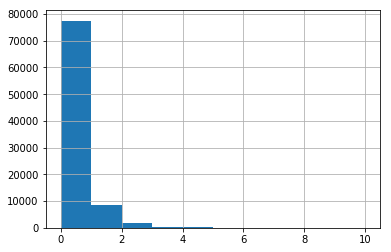

In [9]:
submission['ships'] = submission['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = submission.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids['has_ship_vec'] = unique_img_ids['has_ship'].map(lambda x: [x])
# some files are too small/corrupt
# unique_img_ids['file_size_kb'] = unique_img_ids['ImageId'].map(lambda c_img_id: 
#                                                                os.stat(os.path.join(train_image_dir, 
#                                                                                     c_img_id)).st_size/1024)
# unique_img_ids = unique_img_ids[unique_img_ids['file_size_kb']>50] # keep only 50kb files
# unique_img_ids['file_size_kb'].hist()
unique_img_ids['ships'].hist()
# unique_img_ids.sample(10)

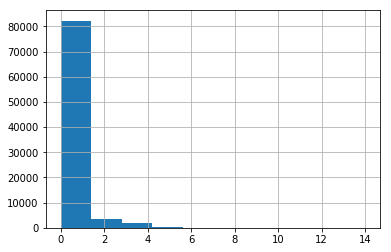

In [10]:
submission_1['ships'] = submission_1['EncodedPixels'].map(lambda c_row: 1 if isinstance(c_row, str) else 0)
unique_img_ids = submission_1.groupby('ImageId').agg({'ships': 'sum'}).reset_index()
unique_img_ids['has_ship'] = unique_img_ids['ships'].map(lambda x: 1.0 if x>0 else 0.0)
unique_img_ids['has_ship_vec'] = unique_img_ids['has_ship'].map(lambda x: [x])
# some files are too small/corrupt
# unique_img_ids['file_size_kb'] = unique_img_ids['ImageId'].map(lambda c_img_id: 
#                                                                os.stat(os.path.join(train_image_dir, 
#                                                                                     c_img_id)).st_size/1024)
# unique_img_ids = unique_img_ids[unique_img_ids['file_size_kb']>50] # keep only 50kb files
# unique_img_ids['file_size_kb'].hist()
unique_img_ids['ships'].hist()

## Remove duplicate pixels

In [ ]:
def rle_encode(img):
    '''
    img: numpy array, 1 - mask, 0 - background
    Returns run length as string formated
    '''
    pixels = img.T.flatten()
    pixels = np.concatenate([[0], pixels, [0]])
    runs = np.where(pixels[1:] != pixels[:-1])[0] + 1
    runs[1::2] -= runs[::2]
    return ' '.join(str(x) for x in runs)

def rle_decode(mask_rle, shape=(768, 768)):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return
    Returns numpy array, 1 - mask, 0 - background

    '''
    s = mask_rle.split()
    starts, lengths = [np.asarray(x, dtype=int) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0]*shape[1], dtype=np.uint8)
    for lo, hi in zip(starts, ends):
        img[lo:hi] = 1
    return img.reshape(shape).T

In [ ]:
sub_df = pd.read_csv("~/Downloads/submission_20180825T0545.csv")
sub_df.describe()
sub_df.head()

In [ ]:
multiple_instances_mask = sub_df.duplicated(subset="ImageId", keep=False)
multiple_instances_df = sub_df[multiple_instances_mask]
multiple_instances_df.head()

In [ ]:
example_mask = multiple_instances_df["ImageId"] == "443cfdb6a.jpg"
image_id_df = multiple_instances_df[example_mask]
print(image_id_df)

In [ ]:
unique_ids_multiple_instances = multiple_instances_df.ImageId.unique()
print("Checking ", len(unique_ids_multiple_instances), "unique images")
out_pred_rows = []
for image_id in unique_ids_multiple_instances:
    
#     print(image_id)
    # Image masks in RLE
    img_masks = multiple_instances_df.loc[multiple_instances_df['ImageId'] == image_id, 'EncodedPixels'].tolist()
#     print("Initial", img_masks)
    
    # Mask array placeholder
    mask_array = np.zeros([768, 768, len(img_masks)],dtype=np.uint8)

    # Build mask array
    for index, mask in enumerate(img_masks):
        mask_array[:,:,index] = rle_decode(mask, [768, 768])

#     print("mask_array shape", mask_array.shape)
    loop_range = np.array(mask_array).shape[-1] - 1
#     print("loop_range", np.arange(loop_range))
    
    # Check for overlap and remove overlapped pixels
    for i in np.arange(loop_range):
#         print("i: ", i)
        mask = mask_array[:,:,i]
        
        loop_j = np.arange(loop_range-i)+i+1
#         print(loop_j)
        for j in loop_j:
#             print("j: ", j)
            next_mask = mask_array[:,:,j]
            
            index_of_overlap = np.logical_and(mask, next_mask)
            if any(index_of_overlap.flatten()):
                    print("OVERLAP ", image_id)
                    next_mask[index_of_overlap] = 0
#             else: 
#                 print("NO OVERLAP")
        
    # Convert back into RLE encoding
    re_encoded_to_rle_list = []
    for i in np.arange(np.array(mask_array).shape[-1]):
        boolean_mask = mask_array[:,:,i]
        re_encoded_to_rle = rle_encode(boolean_mask)
        re_encoded_to_rle_list.append(re_encoded_to_rle)

#     print("---------------------")

#     print("Ending", re_encoded_to_rle_list)
    
    if len(re_encoded_to_rle_list) == 0:
        out_pred_rows += [{'ImageId': image_id, 'EncodedPixels': None}]
    else:
        for rle_mask in re_encoded_to_rle_list:
            out_pred_rows += [{'ImageId': image_id, 'EncodedPixels': rle_mask}]
            
no_overlap_df = pd.DataFrame(out_pred_rows)[['ImageId', 'EncodedPixels']]
    
#     print(no_overlap_df)
    
    
    

In [ ]:
        
np.arange(2)+1
        

In [ ]:
a1 = np.array([[1,1,0,0],
               [1,1,0,0]])
a2 = np.array([[0,0,0,0],
               [0,1,1,0]])
a3 = np.array([[0,1,1,0],
               [0,0,0,0]])
masks = np.zeros([2,4,3])
masks[:,:,0] = a1
masks[:,:,1] = a2
masks[:,:,2] = a3
masks.shape

In [ ]:
# print("Masks", masks)
for index, mask in enumerate(masks):
    for next_mask in masks[index+1:]:
        index_of_overlap = np.logical_and(mask, next_mask)
        if any(index_of_overlap.flatten()):
            next_mask[index_of_overlap] = 0
    
print(masks)

In [ ]:
index_of_overlap = np.logical_and(a1,a2,a3)
index_of_overlap

a2[index_of_overlap] = 0
a3[index_of_overlap] = 0

In [ ]:
print(a1)
print(a2)
print(a3)